# Load Libraries #

In [13]:
import pandas as pd 
import numpy as np
import random
from datetime import datetime
from IPython.core.display import Image, HTML

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot') 


# Load The Data #

In [27]:
stock_symbols = ['aapl','amzn','msft','data','fb']

df = pd.DataFrame()
for stock_symbol in stock_symbols:
    data = pd.read_csv(stock_symbol + '.csv', na_values=['-'])
    data['Stock_Symbol'] = stock_symbol
    df = df.append(data)
    


msft    251
data    251
fb      251
amzn    251
aapl    251
Name: Stock_Symbol, dtype: int64

# Clean The Data #

In [17]:
# Turn Indexes into Dates
df['Date'] = pd.to_datetime(df['\xef\xbb\xbfDate'])
df.set_index('Date', inplace=True)

# Create Columns for Month & Year
df['Year'] = df.index.year
df['Month'] = df.index.month


# Plot The Data #

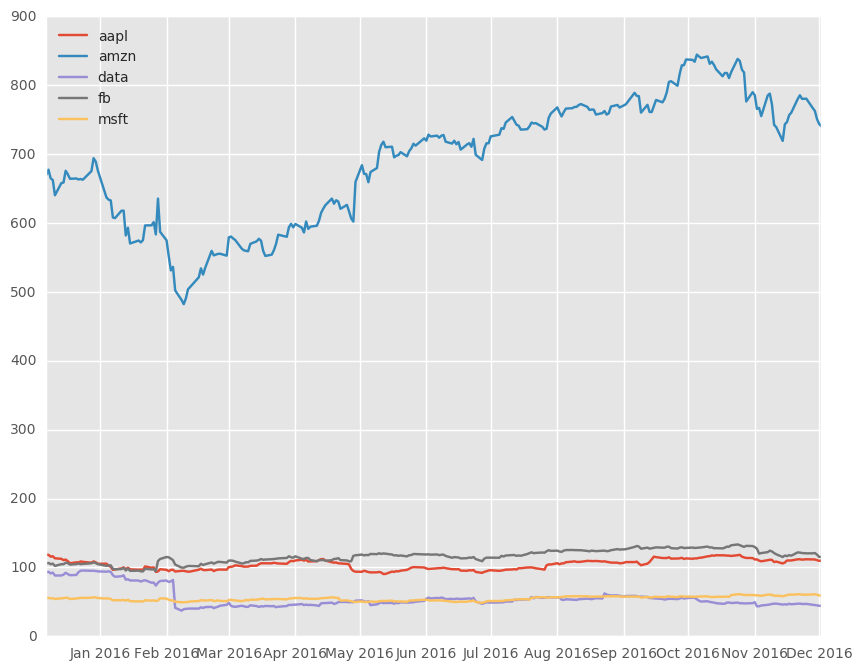

In [18]:
# Line Graph of Stocks

plt.figure(figsize=(10,8))
for k, g in df.groupby(['Stock_Symbol']):
    plt.plot(g['Close'], label = k)
plt.legend(loc='best')
plt.show()

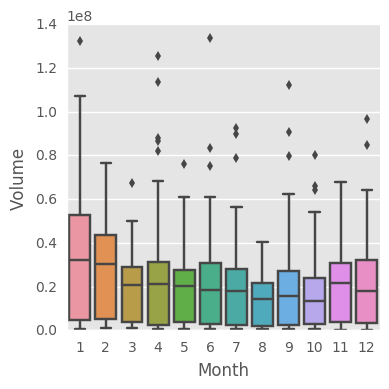

In [19]:
# Box Whisker Plot For Each Month's Volume# 

sns.factorplot(
    x='Month',
    y='Volume',
    data=df,
    kind='box'
)



In [24]:
# Autocorrelation - closing price for all companies by mean


def correlation(stock_symbol):
    print "One day Mean: ",stock_symbol.resample('D').mean().autocorr(lag=1)
    print "One month Mean: ",stock_symbol.resample('D').mean().autocorr(lag=30)
    print "Six month Mean: ",stock_symbol.resample('D').mean().autocorr(lag=6*30)
    print "\n"

for x, y in df.groupby(['Stock_Symbol']):
    print x
    correlation(g['Close'])
    

aapl
One day Mean:  0.967891608725
One month Mean:  0.556553569542
Six month Mean:  -0.503184432186


amzn
One day Mean:  0.967891608725
One month Mean:  0.556553569542
Six month Mean:  -0.503184432186


data
One day Mean:  0.967891608725
One month Mean:  0.556553569542
Six month Mean:  -0.503184432186


fb
One day Mean:  0.967891608725
One month Mean:  0.556553569542
Six month Mean:  -0.503184432186


msft
One day Mean:  0.967891608725
One month Mean:  0.556553569542
Six month Mean:  -0.503184432186


